In [7]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/content/mfcc_features.xlsx")  # Replace with your actual file name

# Convert the 'feature' column: remove brackets, split by space, and convert to floats
df["feature"] = df["feature"].apply(lambda x: list(map(float, x.strip("[]").split())))

# Print the modified DataFrame
print(df.head())

# Check the type of the first row's feature column to confirm
print(type(df.loc[0, "feature"]))  # Should output: <class 'list'>


                                             feature    label
0  [-272.0904, 227.89638, -44.29755, 21.46706, -1...  airport
1  [-247.68332, 189.70059, -1.2136618, -6.76976, ...  airport
2  [-215.39197, 200.5442, -50.123859, -5.3323636,...  airport
3  [-222.74742, 219.78177, -11.528661, -5.698456,...  airport
4  [-302.21802, 152.33171, -5.626728, 18.78396, 1...  airport
<class 'list'>


In [14]:
df.head()

feature    label
0  [-272.0904, 227.89638, -44.29755, 21.46706, -1...  airport
1  [-247.68332, 189.70059, -1.2136618, -6.76976, ...  airport
2  [-215.39197, 200.5442, -50.123859, -5.3323636,...  airport
3  [-222.74742, 219.78177, -11.528661, -5.698456,...  airport
4  [-302.21802, 152.33171, -5.626728, 18.78396, 1...  airport

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset (assuming df is already created)
X = np.array(df["feature"].tolist(), dtype=np.float32)  # Convert features to NumPy array

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(df["label"])  # Convert categorical labels to integers
y = to_categorical(y, num_classes=10)   # One-hot encode the labels for 10 classes

# Reshape features for CNN: (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")  # 10 classes
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print("Test Accuracy:", test_acc)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3778/3778 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4055 - loss: 1.8285 - val_accuracy: 0.5335 - val_loss: 1.1986
Epoch 2/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5159 - loss: 1.2532 - val_accuracy: 0.5642 - val_loss: 1.1377
Epoch 3/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5392 - loss: 1.1917 - val_accuracy: 0.5801 - val_loss: 1.0882
Epoch 4/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5545 - loss: 1.1582 - val_accuracy: 0.5798 - val_loss: 1.0905
Epoch 5/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5675 - loss: 1.1316 - val_accuracy: 0.5962 - val_loss: 1.0485
Epoch 6/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5691 - loss: 1.1234 - val_accuracy: 0.6067 - val_loss: 1.0282
Epoch 7/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5737 - loss: 1.1089 - val_accuracy: 0.5991 - val_loss: 1.0505
Epoch 8/20
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5779 - loss: 1.1016 - val_acc

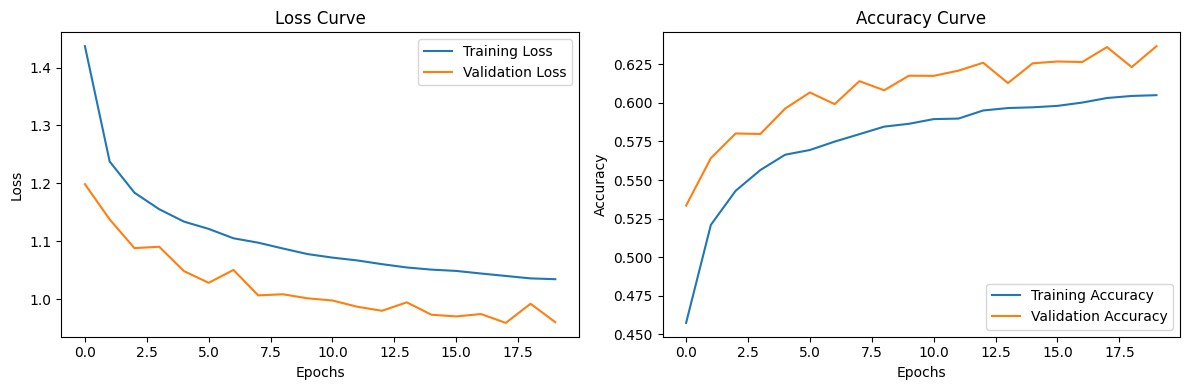

In [17]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
